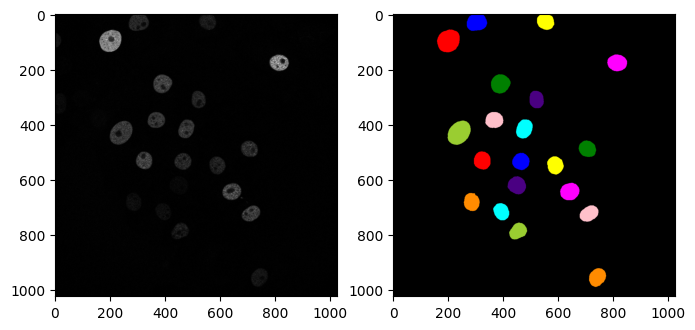

In [146]:
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import label2rgb

img_path = "../../tests/testdata/cell_img.tif"
mask_path = "../../tests/testdata/cell_mask.tif"

image = io.imread(img_path)
mask = io.imread(mask_path)
_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(label2rgb(mask))
plt.show()

In [147]:
import skimage.measure as measure
import numpy as np
import pickle


with open('../../output.pkl', 'rb') as f:
    x = pickle.load(f)
x[1].keys()

dict_keys(['bbox', 'Mask Descriptors', 'Histrogram Descriptors', 'Moments', 'Central Moments', 'Hu Moments', 'GLCM Features', 'Granulometry', 'PowerSpectrum', 'Autocorrelation', 'LocalBinaryPattern', 'GaborFilters'])

Single cell

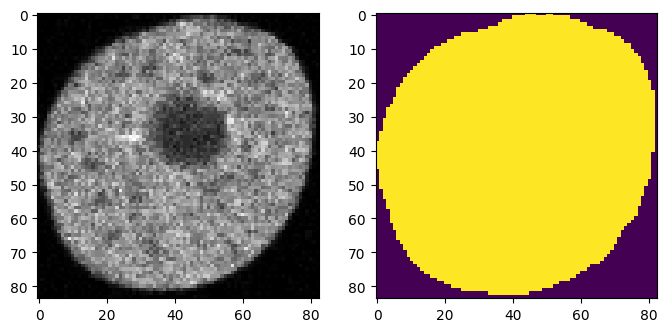

In [148]:
def GetCellData(id):

    cell_data = x[id]

    # crop
    min_row, min_col, max_row, max_col = cell_data["bbox"]
    region_img = np.copy(image[min_row:max_row + 1, min_col:max_col + 1])
    region_mask = np.copy(mask[min_row:max_row + 1, min_col:max_col + 1])
    return cell_data, region_img, region_mask

cell_data, region_img, region_mask = GetCellData(1)
_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(region_img, cmap='gray')
ax[1].imshow(region_mask)
plt.show()



## Mask descriptors

In [149]:
mask_descriptors = cell_data["Mask Descriptors"]
mask_descriptors

{'area': 5356,
 'perimeter': 275.27922061357856,
 'convex_perimeter': 274.45079348883235,
 'major_axis': 0,
 'minor_axis': 0,
 'bbox_size': 6972,
 'elongation': 1.0120481927710843,
 'compactness': 0.8881852821447629,
 'circularity': 0.8935553324038412,
 'convexity': 0.9969905933223012}

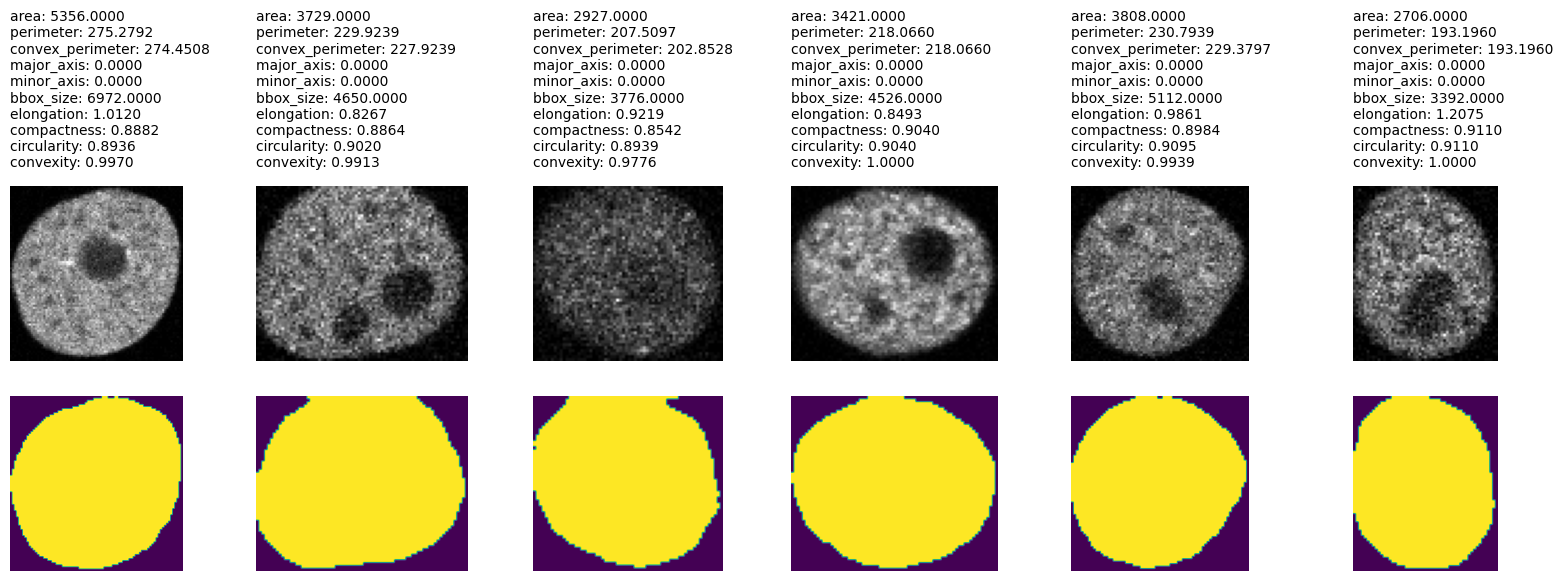

In [150]:
n = 6
_, ax = plt.subplots(2, n, figsize=(20, 5))
for i in list(x.keys())[:n]:
    cell_data, region_img, region_mask = GetCellData(i)
    ax[0,i-1].imshow(region_img, cmap='gray')
    ax[1,i-1].imshow(region_mask)
    ax[0,i-1].axis('off')
    ax[1,i-1].axis('off')
    ax[0,i-1].set_anchor('N')
    ax[1,i-1].set_anchor('N')
    mask_descriptors = cell_data["Mask Descriptors"]
    desc_text = ""
    for key, value in mask_descriptors.items():
        desc_text += "{}: {:.4f}\n".format(key, value)
    ax[0,i-1].set_title(desc_text, ha='left', va='top', fontsize=10, x=0.0)

## Histogram descriptors

In [151]:
mask_descriptors = cell_data["Histrogram Descriptors"]
mask_descriptors

{'mean': 36.567567567567565,
 'std': 0.027468922352430276,
 'var': 0.0007545416952038437,
 'median': 0.0,
 'max': 282,
 'min': 0,
 'argmax': 27,
 'moment3': 4.283296802547977e-05,
 'geometric_mean': 0.0,
 'skewness': 2.066585147721319,
 'kurtosis': 3.01893716243148,
 'entropy': 2.8130808408409056,
 'energy': 0.06934959895859794,
 'smoothness': 0.0007539727912958538}

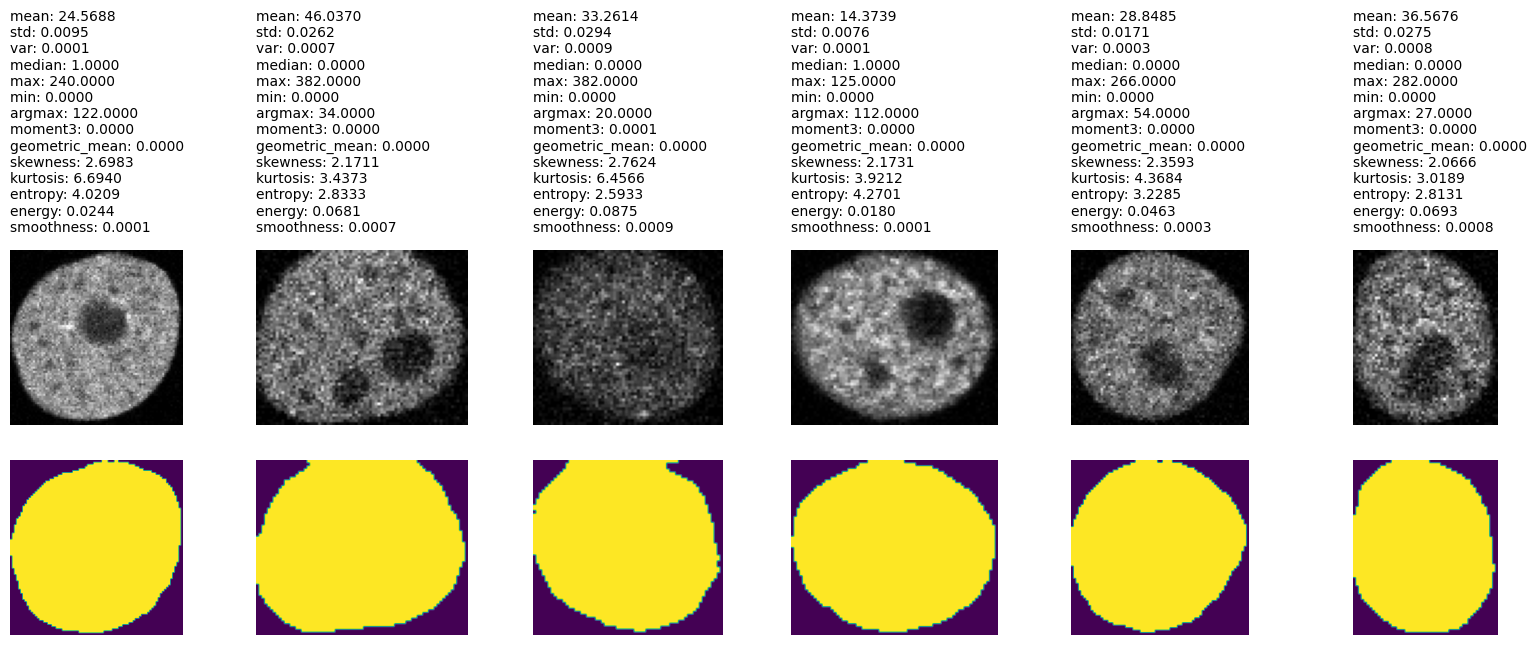

In [152]:
n = 6
_, ax = plt.subplots(2, n, figsize=(20, 5))
for i in list(x.keys())[:n]:
    cell_data, region_img, region_mask = GetCellData(i)
    ax[0,i-1].imshow(region_img, cmap='gray')
    ax[1,i-1].imshow(region_mask)
    ax[0,i-1].axis('off')
    ax[1,i-1].axis('off')
    ax[0,i-1].set_anchor('N')
    ax[1,i-1].set_anchor('N')
    mask_descriptors = cell_data["Histrogram Descriptors"]
    desc_text = ""
    for key, value in mask_descriptors.items():
        desc_text += "{}: {:.4f}\n".format(key, value)
    ax[0,i-1].set_title(desc_text,  ha='left', va='top', fontsize=10, x=0.0)

## GLCM features

In [153]:
mask_descriptors = cell_data["GLCM Features"]
mask_descriptors

{'contrast': array([[203.75852817, 220.52068032, 210.63559969, 223.50774593]]),
 'dissimilarity': array([[11.20429283, 11.67182064, 11.23605806, 11.74864446]]),
 'homogeneity': array([[0.11859749, 0.12085995, 0.13227779, 0.10939883]]),
 'ASM': array([[0.00593796, 0.00583259, 0.00595688, 0.00580765]]),
 'energy': array([[0.07705817, 0.07637138, 0.07718082, 0.07620794]]),
 'correlation': array([[0.41269857, 0.36654281, 0.39600702, 0.35797857]]),
 'entropy': array([[5.38136993, 5.39100023, 5.38551841, 5.39564816]]),
 'max': array([[0.01051683, 0.01190476, 0.01227913, 0.01098901]])}

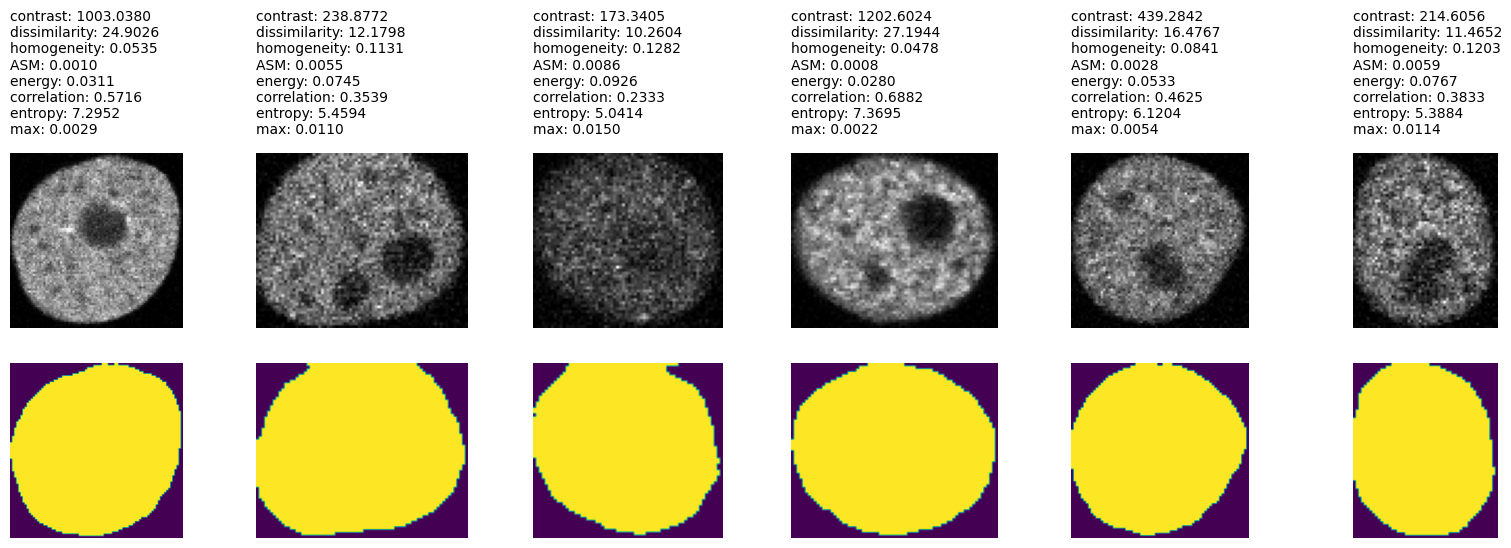

In [154]:
n = 6
_, ax = plt.subplots(2, n, figsize=(20, 5))
for i in list(x.keys())[:n]:
    cell_data, region_img, region_mask = GetCellData(i)
    ax[0,i-1].imshow(region_img, cmap='gray')
    ax[1,i-1].imshow(region_mask)
    ax[0,i-1].axis('off')
    ax[1,i-1].axis('off')
    ax[0,i-1].set_anchor('N')
    ax[1,i-1].set_anchor('N')
    mask_descriptors = cell_data["GLCM Features"]
    desc_text = ""
    for key, value in mask_descriptors.items():
        desc_text += "{}: {:.4f}\n".format(key, np.mean(value))
    ax[0,i-1].set_title(desc_text,  ha='left', va='top', fontsize=10, x=0.0)

## Autocorrelation

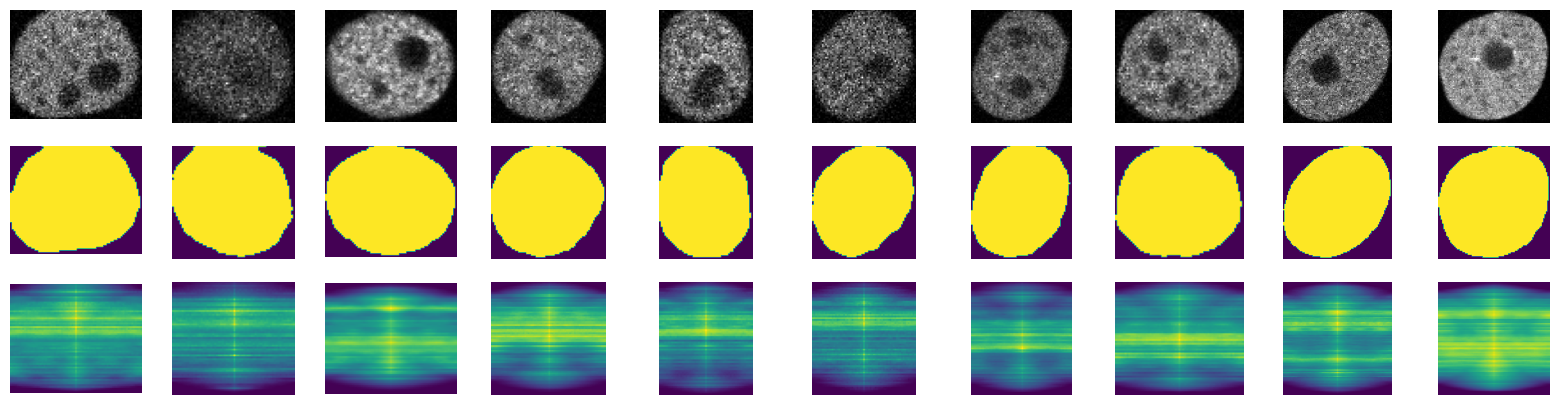

In [155]:
mask_descriptors = cell_data["Autocorrelation"]
mask_descriptors


n = 10
_, ax = plt.subplots(3, n, figsize=(20, 5))
for idx, i in enumerate(list(x.keys())[:n]):
    cell_data, region_img, region_mask = GetCellData(i)
    ax[0,idx-1].imshow(region_img, cmap='gray')
    ax[1,idx-1].imshow(region_mask)
    ax[0,idx-1].axis('off')
    ax[1,idx-1].axis('off')
    ax[0,idx-1].set_anchor('N')
    ax[1,idx-1].set_anchor('N')

    ax[2,idx-1].imshow(cell_data["Autocorrelation"])
    ax[2,idx-1].axis('off')

## Local binary patterns

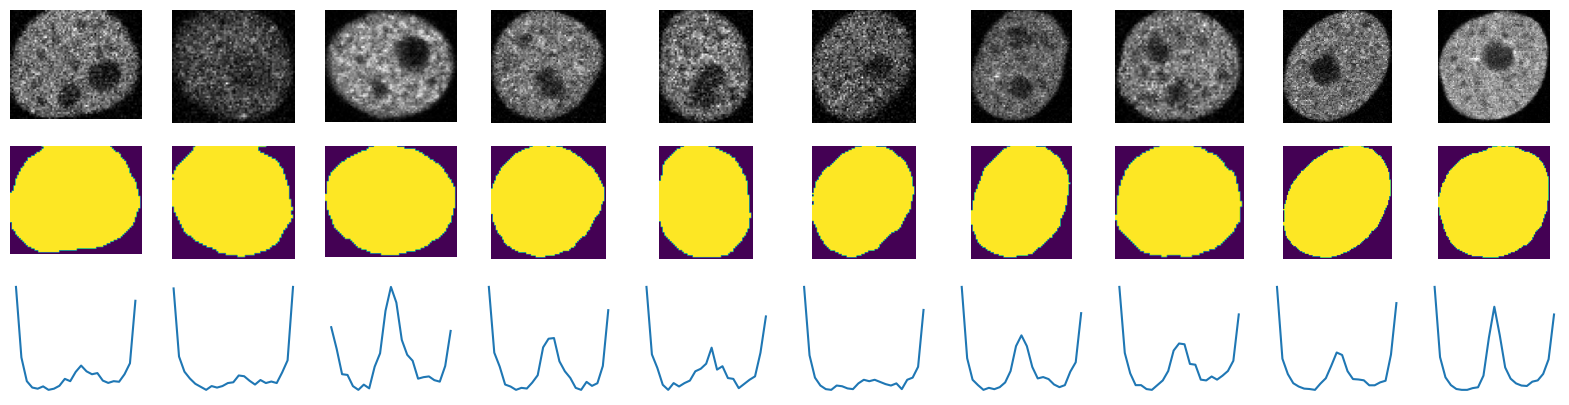

In [156]:
mask_descriptors = cell_data["LocalBinaryPattern"]
mask_descriptors


n = 10
_, ax = plt.subplots(3, n, figsize=(20, 5))
for idx, i in enumerate(list(x.keys())[:n]):
    cell_data, region_img, region_mask = GetCellData(i)
    ax[0,idx-1].imshow(region_img, cmap='gray')
    ax[1,idx-1].imshow(region_mask)
    ax[0,idx-1].axis('off')
    ax[1,idx-1].axis('off')
    ax[0,idx-1].set_anchor('N')
    ax[1,idx-1].set_anchor('N')

    ax[2,idx-1].plot(cell_data["LocalBinaryPattern"][1:-1])
    ax[2,idx-1].axis('off')